## Week 10

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
joined_drop = pd.read_pickle('../data/week9.pkl')
joined_drop.head()

,sku,cost,retail,stype,quantity,orgprice,amt,style,color,size,packsize,vendor,brand,standardized_color,standardized_size,standardized_style
0,8936935,9.58,-0.603488,P,1,24.0,24.00,3592413641,WHEATNUBU,L,-0.225073,914938,KIDS HEA,Other,Standard Sizes,Other
1,8940963,4.31,-0.730408,P,1,11.0,8.25,005U61516,GREYHE,L,0.081489,4012768,TOMMY HI,Grey,Standard Sizes,Other
2,8944045,28.05,-0.173912,P,1,68.0,29.99,CC412,MULTI,M,-0.225073,8043525,KORET OF,Multi,Standard Sizes,Other
3,8944045,25.00,-0.271543,P,1,58.0,29.00,CC412,MULTI,M,-0.225073,8043525,KORET OF,Multi,Standard Sizes,Other
4,8972921,14.72,-0.154386,P,1,35.0,35.00,TPILTRAQL,TERRA,BOU PIL,-0.071792,619402,STATUS Q,Other,Standard Sizes,Other


In [4]:
#select a subset of data to work with
joined_drop=joined_drop[["sku","stype","retail","standardized_style","standardized_color","standardized_size","vendor","brand","packsize"]]
joined_drop.head(10)

,sku,stype,retail,standardized_style,standardized_color,standardized_size,vendor,brand,packsize
0,8936935,P,-0.603488,Other,Other,Standard Sizes,914938,KIDS HEA,-0.225073
1,8940963,P,-0.730408,Other,Grey,Standard Sizes,4012768,TOMMY HI,0.081489
2,8944045,P,-0.173912,Other,Multi,Standard Sizes,8043525,KORET OF,-0.225073
3,8944045,P,-0.271543,Other,Multi,Standard Sizes,8043525,KORET OF,-0.225073
4,8972921,P,-0.154386,Other,Other,Standard Sizes,619402,STATUS Q,-0.071792
5,8972921,P,-0.154386,Other,Other,Standard Sizes,619402,STATUS Q,-0.071792
6,8972921,P,-0.154386,Other,Other,Standard Sizes,619402,STATUS Q,-0.071792
7,8972921,P,-0.154386,Other,Other,Standard Sizes,619402,STATUS Q,-0.071792
8,8972921,P,-0.154386,Other,Other,Standard Sizes,619402,STATUS Q,-0.071792
9,8972921,P,-0.154386,Other,Other,Standard Sizes,619402,STATUS Q,-0.071792


In [5]:
joined_drop.shape

(220276, 9)

In [6]:
# Calculate the count of 'R' in 'stype' for each 'sku'
r_count = joined_drop[joined_drop['stype'] == 'R'].groupby('sku').size()

# Calculate the total count for each 'sku'
total_count = joined_drop.groupby('sku').size()

# Compute the return rate
return_rate = round(r_count*100 / total_count,2)

# Convert return_rate to a DataFrame
return_rate_df = return_rate.reset_index().rename(columns={0: 'return_rate(%)'})

# Merge the return rate back into the original DataFrame
joined_drop = joined_drop.merge(return_rate_df, on='sku', how='left')

# Fill NaN values with 0 if there are skus without 'R' in 'stype'
joined_drop['return_rate(%)'].fillna(0, inplace=True)

# Display the first 10 rows
joined_drop.head(20)

,sku,stype,retail,standardized_style,standardized_color,standardized_size,vendor,brand,packsize,return_rate(%)
0,8936935,P,-0.603488,Other,Other,Standard Sizes,914938,KIDS HEA,-0.225073,0.0
1,8940963,P,-0.730408,Other,Grey,Standard Sizes,4012768,TOMMY HI,0.081489,0.0
2,8944045,P,-0.173912,Other,Multi,Standard Sizes,8043525,KORET OF,-0.225073,0.0
3,8944045,P,-0.271543,Other,Multi,Standard Sizes,8043525,KORET OF,-0.225073,0.0
4,8972921,P,-0.154386,Other,Other,Standard Sizes,619402,STATUS Q,-0.071792,0.0
5,8972921,P,-0.154386,Other,Other,Standard Sizes,619402,STATUS Q,-0.071792,0.0
6,8972921,P,-0.154386,Other,Other,Standard Sizes,619402,STATUS Q,-0.071792,0.0
7,8972921,P,-0.154386,Other,Other,Standard Sizes,619402,STATUS Q,-0.071792,0.0
8,8972921,P,-0.154386,Other,Other,Standard Sizes,619402,STATUS Q,-0.071792,0.0
9,8972921,P,-0.154386,Other,Other,Standard Sizes,619402,STATUS Q,-0.071792,0.0


In [7]:
#remove duplicate entries
newdf = joined_drop.groupby('sku').agg({
    'return_rate(%)': 'mean', 
    'standardized_style': 'first', 
    'retail': 'mean', 
    'standardized_color': 'first', 
    'standardized_size': 'first', 
    'vendor': 'first', 
    'brand': 'first', 
    'packsize': 'mean'
}).reset_index()
newdf

,sku,return_rate(%),standardized_style,retail,standardized_color,standardized_size,vendor,brand,packsize
0,1000331,0.00,Other,-0.056755,White,Numeric Sizes,6016957,CABERNET,-0.225073
1,1000597,7.69,Other,-0.369174,Other,Standard Sizes,8014780,NORITAKE,-0.225073
2,1000940,11.11,Other,-0.154386,Blue,Standard Sizes,3622251,SARA LEE,-0.225073
3,1001712,0.00,Other,1.114814,Other,Standard Sizes,1954376,MIKASA,-0.225073
4,1001777,0.00,Other,0.411872,Black,Numeric Sizes,7526185,AGB,-0.225073
...,...,...,...,...,...,...,...,...,...
45632,999906,0.00,Other,-0.681592,Yellow,Standard Sizes,3626213,MILCO IN,0.081489
45633,9999170,1.79,Numeric Styles,-0.154386,White,Standard Sizes,5511283,CLINIQUE,0.081489
45634,9999298,0.00,Other,0.900026,Red,Standard Sizes,8227288,WOLFF SH,-0.225073
45635,9999683,20.00,Other,-0.056755,Brown,Numeric Sizes,9520439,CABERNET,-0.225073


In [8]:
newdf["return_rate(%)"] = newdf["return_rate(%)"] / 100

In [9]:
newdf["return_rate(%)"].describe()

count    45637.000000
mean         0.055228
std          0.190371
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: return_rate(%), dtype: float64

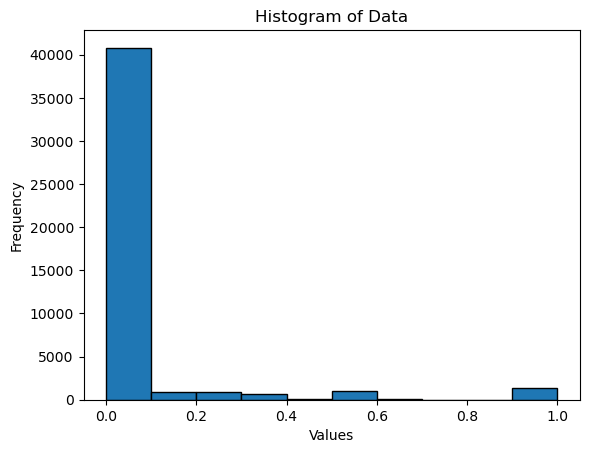

In [10]:
plt.hist(newdf["return_rate(%)"], bins=10, edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Show the plot
plt.show()

In [11]:
#if the return rate is greater than or equal to 0.2, then it is very likely to be returned
#if not, then the product is more prone to be purchased. 
def categorize_product(return_rate):
    if return_rate >= 0.2:
        return "R"
    else:
        return "P"

In [12]:
newdf['Predict P or R'] = newdf['return_rate(%)'].apply(categorize_product)
newdf

,sku,return_rate(%),standardized_style,retail,standardized_color,standardized_size,vendor,brand,packsize,Predict P or R
0,1000331,0.0000,Other,-0.056755,White,Numeric Sizes,6016957,CABERNET,-0.225073,P
1,1000597,0.0769,Other,-0.369174,Other,Standard Sizes,8014780,NORITAKE,-0.225073,P
2,1000940,0.1111,Other,-0.154386,Blue,Standard Sizes,3622251,SARA LEE,-0.225073,P
3,1001712,0.0000,Other,1.114814,Other,Standard Sizes,1954376,MIKASA,-0.225073,P
4,1001777,0.0000,Other,0.411872,Black,Numeric Sizes,7526185,AGB,-0.225073,P
...,...,...,...,...,...,...,...,...,...,...
45632,999906,0.0000,Other,-0.681592,Yellow,Standard Sizes,3626213,MILCO IN,0.081489,P
45633,9999170,0.0179,Numeric Styles,-0.154386,White,Standard Sizes,5511283,CLINIQUE,0.081489,P
45634,9999298,0.0000,Other,0.900026,Red,Standard Sizes,8227288,WOLFF SH,-0.225073,P
45635,9999683,0.2000,Other,-0.056755,Brown,Numeric Sizes,9520439,CABERNET,-0.225073,R


In [13]:
#remove the return rate column and keep just features and predicted y
newdf.drop('return_rate(%)', axis=1, inplace=True)
newdf

,sku,standardized_style,retail,standardized_color,standardized_size,vendor,brand,packsize,Predict P or R
0,1000331,Other,-0.056755,White,Numeric Sizes,6016957,CABERNET,-0.225073,P
1,1000597,Other,-0.369174,Other,Standard Sizes,8014780,NORITAKE,-0.225073,P
2,1000940,Other,-0.154386,Blue,Standard Sizes,3622251,SARA LEE,-0.225073,P
3,1001712,Other,1.114814,Other,Standard Sizes,1954376,MIKASA,-0.225073,P
4,1001777,Other,0.411872,Black,Numeric Sizes,7526185,AGB,-0.225073,P
...,...,...,...,...,...,...,...,...,...
45632,999906,Other,-0.681592,Yellow,Standard Sizes,3626213,MILCO IN,0.081489,P
45633,9999170,Numeric Styles,-0.154386,White,Standard Sizes,5511283,CLINIQUE,0.081489,P
45634,9999298,Other,0.900026,Red,Standard Sizes,8227288,WOLFF SH,-0.225073,P
45635,9999683,Other,-0.056755,Brown,Numeric Sizes,9520439,CABERNET,-0.225073,R


In [14]:
# Find the number of NaN values in each column
nas_per_column = newdf.isna().sum()
nas_per_column

sku                   0
standardized_style    0
retail                0
standardized_color    0
standardized_size     0
vendor                0
brand                 0
packsize              0
Predict P or R        0
dtype: int64

In [15]:
#do one hot encoding for style, standardized_color, standardized_size,vendor, and brand
newdf_encoded = pd.get_dummies(newdf, columns=[
    'standardized_style', 'standardized_color', 'standardized_size', 'vendor', 'brand'])
newdf_encoded = newdf_encoded * 1
newdf_encoded

,sku,retail,packsize,Predict P or R,standardized_style_Alphanumeric Styles,standardized_style_Numeric Styles,standardized_style_Other,standardized_style_Product-Specific Styles,standardized_color_Black,standardized_color_Blue,...,brand_WOOLRICH,brand_WORLDWID,brand_WRAPPER/,brand_XOXO,brand_YAMAZAKI,brand_YMI JEAN,brand_Z-CAVARI,brand_ZHEN ZHU,brand_ZIA FILM,brand_ZIRH INT
0,1000331,-0.056755,-0.225073,P,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000597,-0.369174,-0.225073,P,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000940,-0.154386,-0.225073,P,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1001712,1.114814,-0.225073,P,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1001777,0.411872,-0.225073,P,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45632,999906,-0.681592,0.081489,P,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45633,9999170,-0.154386,0.081489,P,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45634,9999298,0.900026,-0.225073,P,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45635,9999683,-0.056755,-0.225073,R,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
import sklearn
print(sklearn.__version__)

1.2.2


In [17]:
# check version number
import imblearn
print(imblearn.__version__)

0.11.0


In [18]:
# Replace 'class_column' with the actual name of your target column
X = newdf_encoded.drop(['Predict P or R',"sku"], axis=1)
y = newdf_encoded['Predict P or R']

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")


# Initialize the model
model = LogisticRegression(C=1, penalty='l1', solver='liblinear')

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

[[6311 2029]
 [ 514  274]]


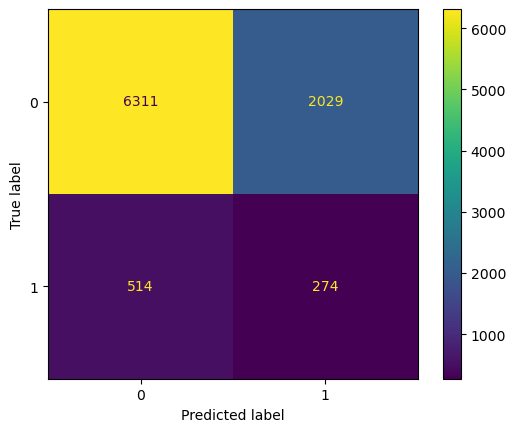

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")
# Assume y_test are the true labels and y_pred are the model's predictions
# y_test = [...]
# y_pred = [...]

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# For a nicer display
ConfusionMatrixDisplay(cm).plot()

# If you're using Jupyter Notebook or similar, you might need to add this to display the plot:
import matplotlib.pyplot as plt
plt.show()


In [21]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           P       0.92      0.76      0.83      8340
           R       0.12      0.35      0.18       788

    accuracy                           0.72      9128
   macro avg       0.52      0.55      0.50      9128
weighted avg       0.86      0.72      0.78      9128

Accuracy: 0.7214066608238388


### Random Forest classifier

In [23]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8913234005258545
Confusion Matrix:
[[8097  243]
 [ 749   39]]
Classification Report:
              precision    recall  f1-score   support

           P       0.92      0.97      0.94      8340
           R       0.14      0.05      0.07       788

    accuracy                           0.89      9128
   macro avg       0.53      0.51      0.51      9128
weighted avg       0.85      0.89      0.87      9128

